##Importing Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

##Loading Data

In [ ]:
train_data = pd.read_csv(r'/content/train.csv')
test_data = pd.read_csv(r'/content/test.csv')

##Data Exploration

In [ ]:
display(train_data.head())
display(test_data.head())


,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [ ]:
display(train_data.describe())
display(test_data.describe())


,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,19.685472,5.019746,4.647391,4.643159,4.827927,4.409027
std,2.510672,1.519052,1.658673,1.703569,1.632564,1.567404
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,21.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
train_data.corr()

<ipython-input-15-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
Age,1.000000,0.026814,-0.031079,0.053638,0.004351,0.049248
openness,0.026814,1.000000,0.013979,0.011460,-0.008310,-0.042549
neuroticism,-0.031079,0.013979,1.000000,0.089869,-0.055299,-0.031371
conscientiousness,0.053638,0.011460,0.089869,1.000000,0.022582,0.029349
agreeableness,0.004351,-0.008310,-0.055299,0.022582,1.000000,-0.035933
extraversion,0.049248,-0.042549,-0.031371,0.029349,-0.035933,1.000000


In [ ]:
print('Number of rows and columns in train data:{}' .format(train_data.shape))
print('Number of rows and columns in test data:{}' .format(test_data.shape))

Number of rows and columns in train data:(709, 8)
Number of rows and columns in test data:(315, 8)


Checking Missing Values

In [ ]:
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

print("Missing values in train data:\n", missing_train[missing_train > 0])
print("\nMissing values in test data:\n", missing_test[missing_test > 0])


Missing values in train data:
 Series([], dtype: int64)

Missing values in test data:
 Series([], dtype: int64)


In [ ]:
missing_values_train = train_data.isnull().sum()
print("Missing values in training data:")
print(missing_values_train)

missing_values_test = test_data.isnull().sum()
print("\nMissing values in test data:")
print(missing_values_test)

Missing values in training data:
Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

Missing values in test data:
Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64


In [ ]:
print(train_data.iloc[0])


Gender                              Male
Age                                   17
openness                               7
neuroticism                            4
conscientiousness                      7
agreeableness                          3
extraversion                           2
Personality (Class label)    extraverted
Name: 0, dtype: object


In [ ]:
print(train_data.head(0))

Empty DataFrame
Columns: [Gender, Age, openness, neuroticism, conscientiousness, agreeableness, extraversion, Personality (Class label)]
Index: []


In [ ]:
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     709 non-null    object
 1   Age                        709 non-null    int64 
 2   openness                   709 non-null    int64 
 3   neuroticism                709 non-null    int64 
 4   conscientiousness          709 non-null    int64 
 5   agreeableness              709 non-null    int64 
 6   extraversion               709 non-null    int64 
 7   Personality (Class label)  709 non-null    object
dtypes: int64(6), object(2)
memory usage: 44.4+ KB
None


In [ ]:
print(train_data['Gender'].value_counts())

Female    380
Male      328
5           1
Name: Gender, dtype: int64


In [ ]:
print(train_data['conscientiousness'].value_counts())

5    166
6    137
4    114
7    108
3     92
2     53
1     38
8      1
Name: conscientiousness, dtype: int64


##Data Visualization

Text(0, 0.5, 'Count')

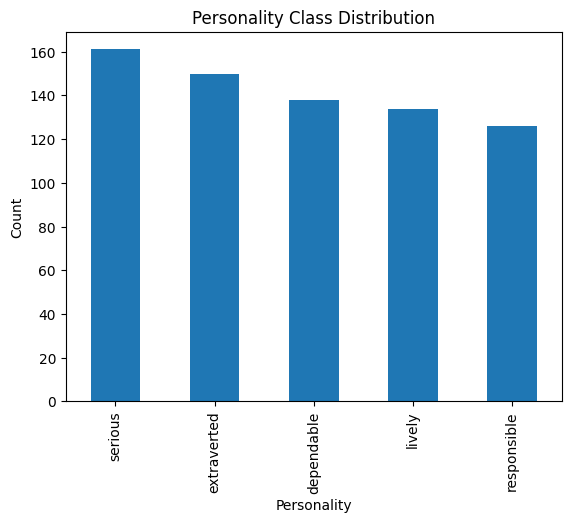

In [ ]:
train_data['Personality (Class label)'].value_counts().plot(kind='bar')
plt.title('Personality Class Distribution')
plt.xlabel('Personality')
plt.ylabel('Count')

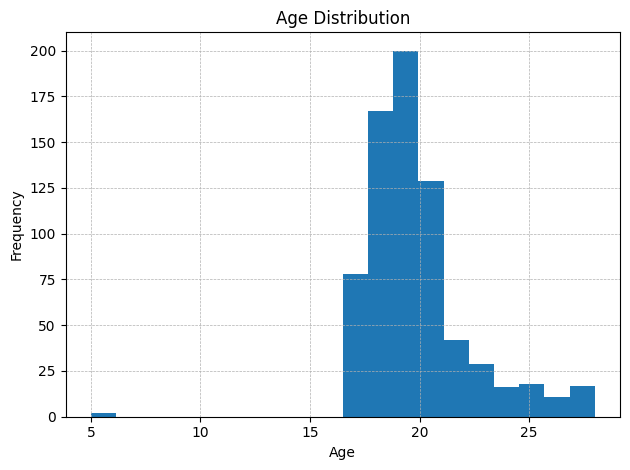

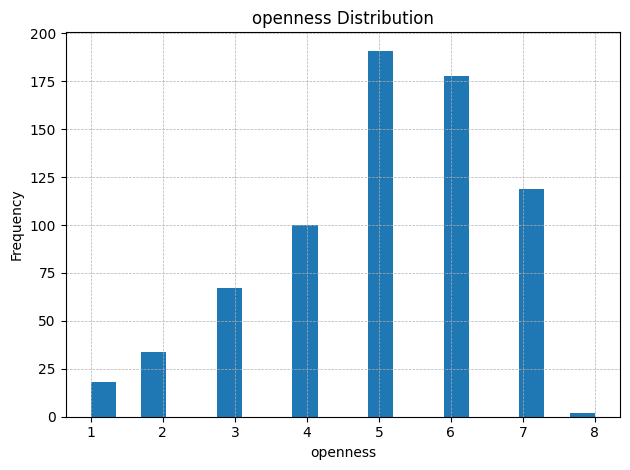

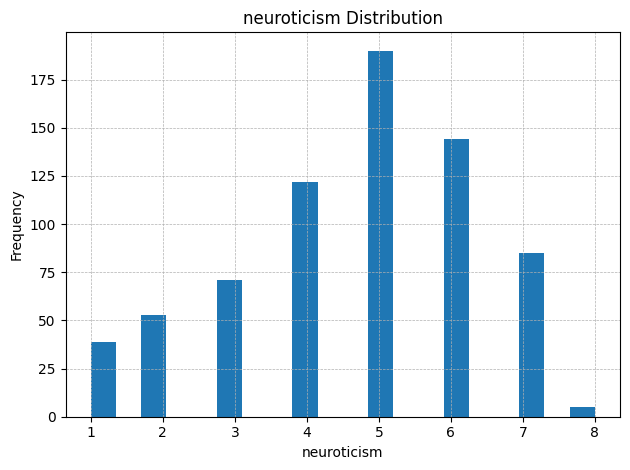

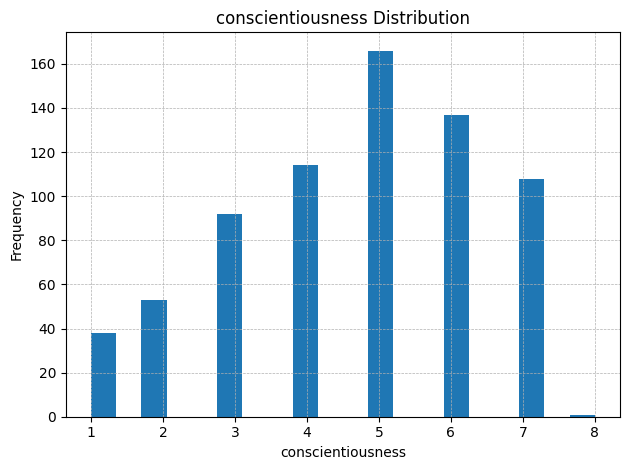

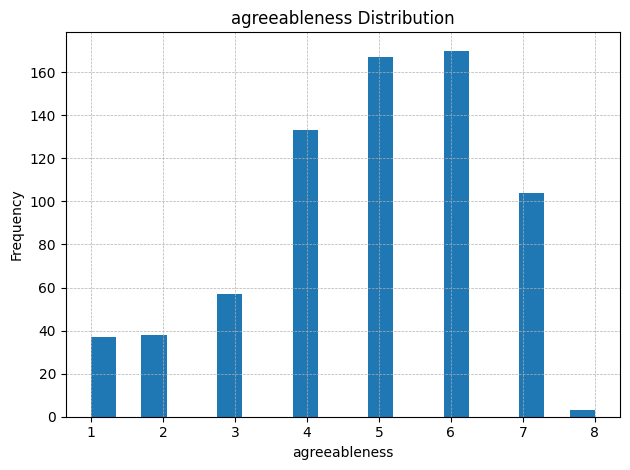

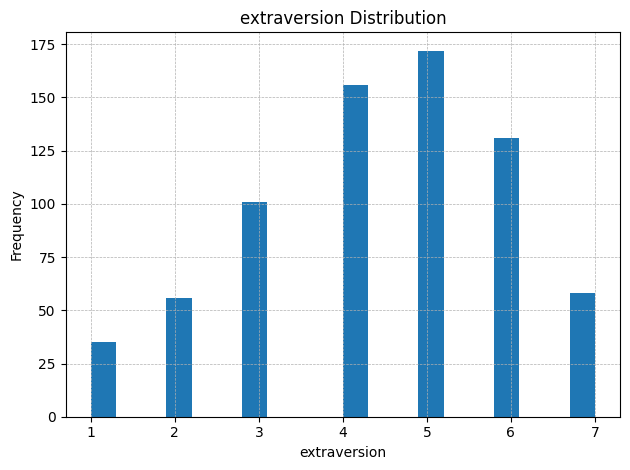

In [ ]:
continuous_columns = ['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']

for column in continuous_columns:
    plt.hist(train_data[column].dropna(), bins=20)  # dropna() to remove missing values
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} Distribution')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


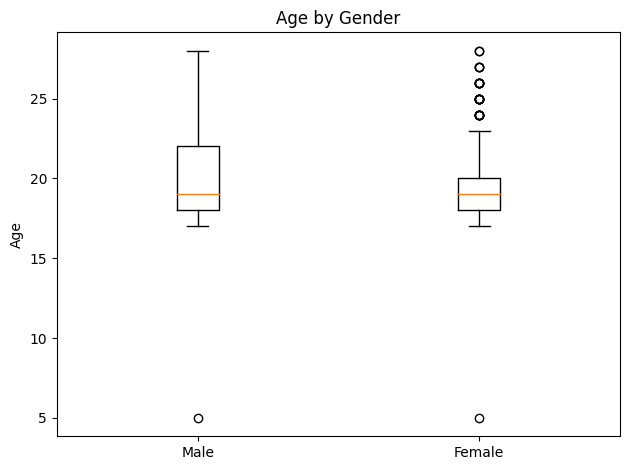

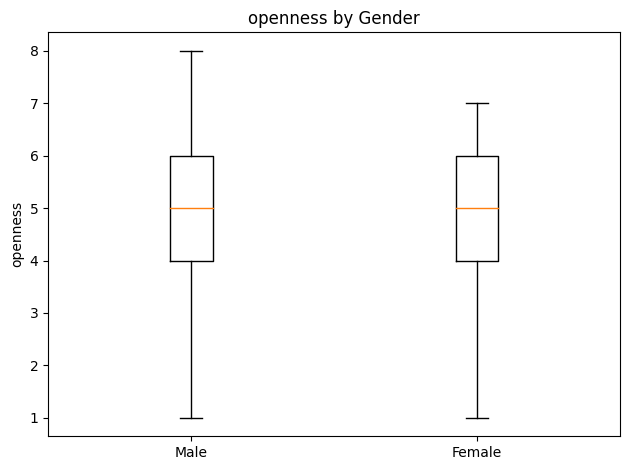

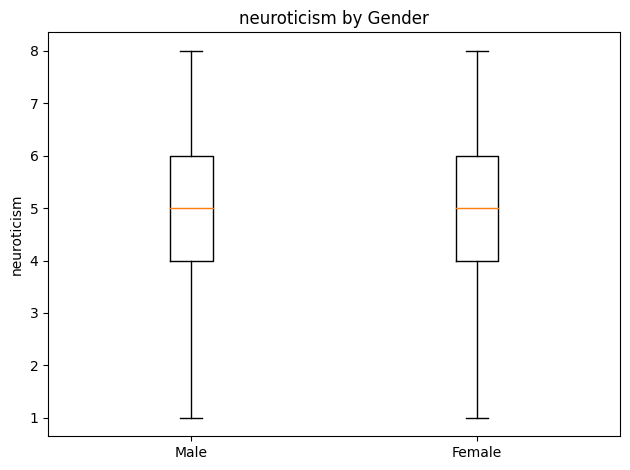

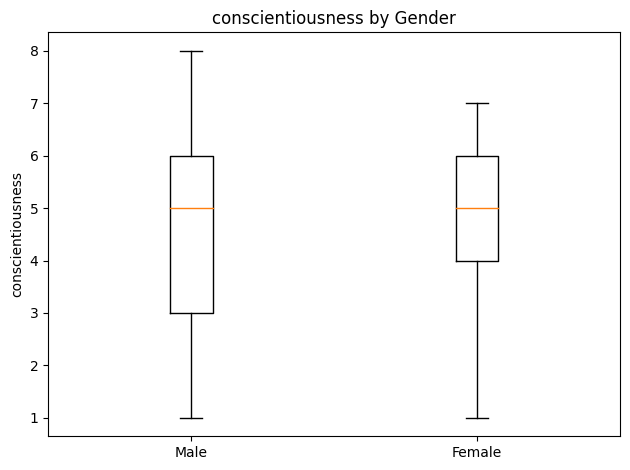

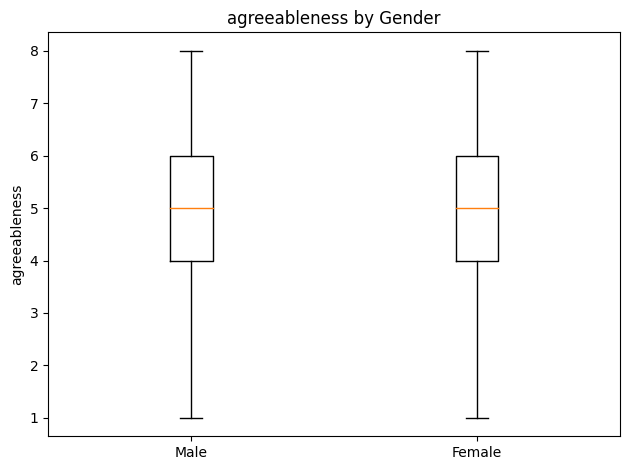

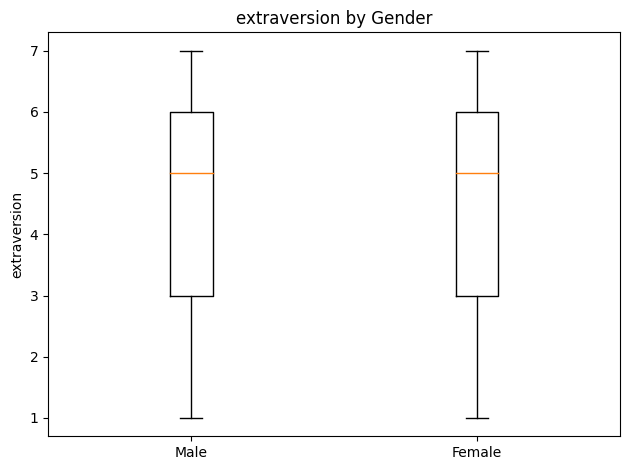

In [ ]:
for column in continuous_columns:
    plt.boxplot([train_data[train_data['Gender'] == 'Male'][column].dropna(),
                 train_data[train_data['Gender'] == 'Female'][column].dropna()],
                labels=['Male', 'Female'])
    plt.title(f'{column} by Gender')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()


It looks like There is no outliers in the Big five traits That awesome!



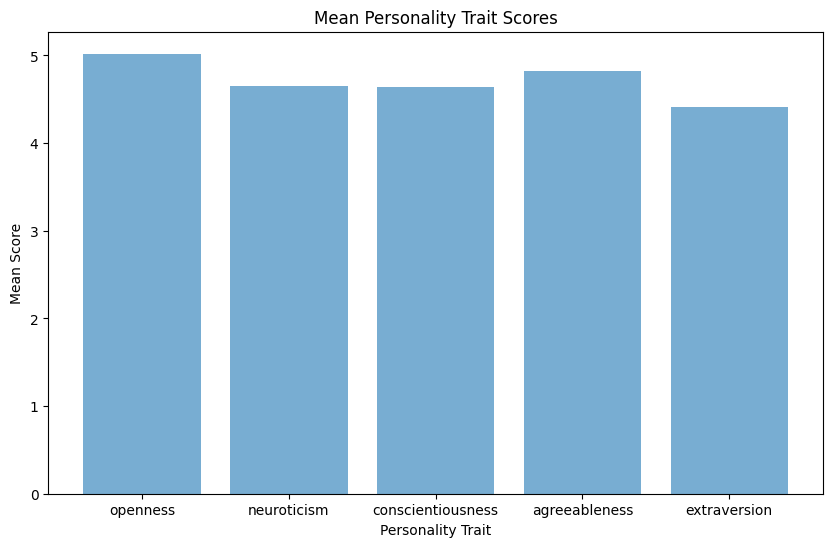

In [ ]:
# Bar plot of Personality Traits
personality_traits = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']
plt.figure(figsize=(10, 6))
plt.bar(personality_traits, train_data[personality_traits].mean(), alpha=0.6)
plt.xlabel('Personality Trait')
plt.ylabel('Mean Score')
plt.title('Mean Personality Trait Scores')
plt.show()

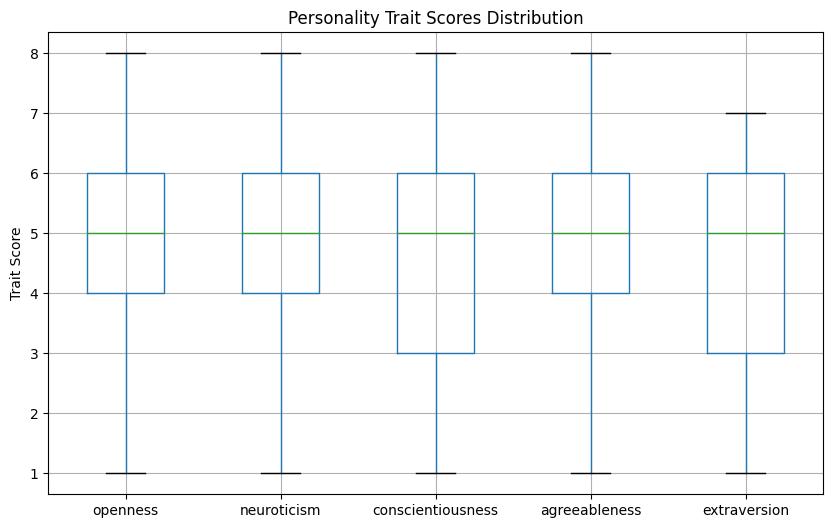

In [ ]:

# Box plot of Personality Traits
plt.figure(figsize=(10, 6))
train_data[personality_traits].boxplot()
plt.ylabel('Trait Score')
plt.title('Personality Trait Scores Distribution')
plt.show()

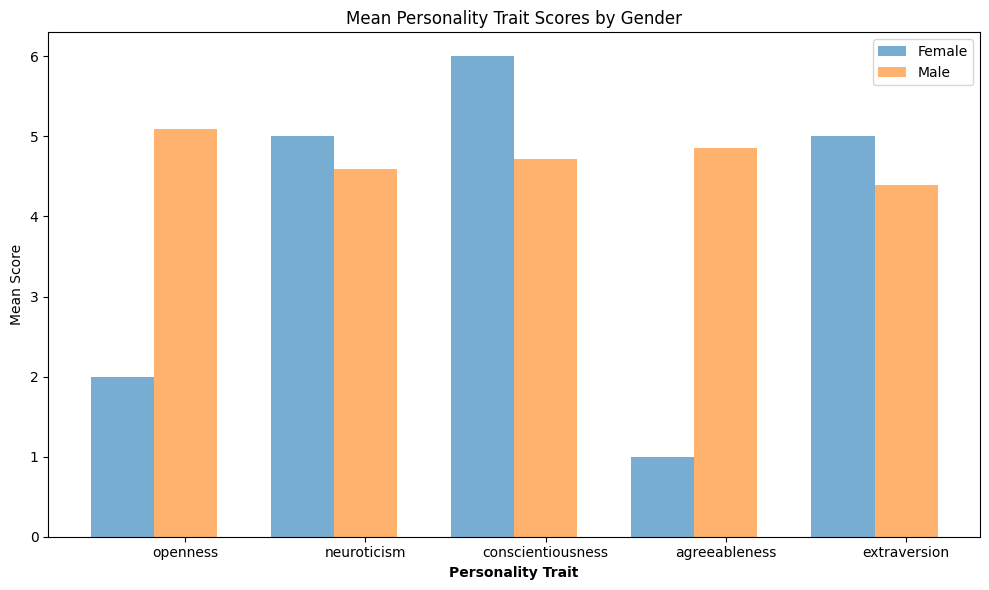

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming personality_traits is a list of your traits like:
# personality_traits = ['openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']

trait_means_by_gender = train_data.groupby('Gender')[personality_traits].mean().reset_index()

# Set the bar width and positions
barWidth = 0.35
r1 = np.arange(len(personality_traits))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 6))

# Create bars
plt.bar(r1, trait_means_by_gender.iloc[0, 1:], width=barWidth, alpha=0.6, label='Female')
plt.bar(r2, trait_means_by_gender.iloc[1, 1:], width=barWidth, alpha=0.6, label='Male')

# Name the x-axis labels, set the title, and other configurations
plt.xlabel('Personality Trait', fontweight='bold')
plt.ylabel('Mean Score')
plt.xticks([r + barWidth for r in range(len(personality_traits))], personality_traits)
plt.title('Mean Personality Trait Scores by Gender')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-30-676e8a3955d4>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Trait', y='Score', hue='conscientiousness', data=melted_data, ci=None, palette=palette)


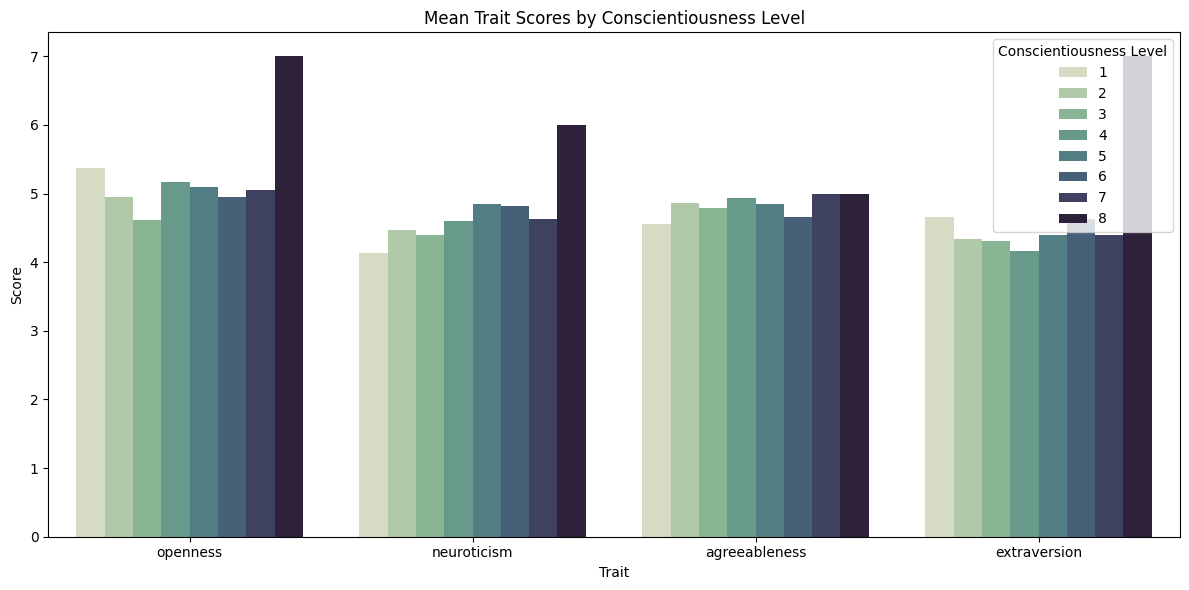

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the palette
palette = sns.cubehelix_palette(8, start=.5, rot=-.75)

# Assuming your data is stored in a DataFrame named "train_data"
# List of traits excluding "conscientiousness" itself
traits = ['openness', 'neuroticism', 'agreeableness', 'extraversion']

# Melt the DataFrame to facilitate plotting with seaborn
melted_data = pd.melt(train_data, id_vars='conscientiousness', value_vars=traits,
                      var_name='Trait', value_name='Score')

plt.figure(figsize=(12, 6))

# Use seaborn's barplot function with the updated palette
sns.barplot(x='Trait', y='Score', hue='conscientiousness', data=melted_data, ci=None, palette=palette)

plt.title('Mean Trait Scores by Conscientiousness Level')
plt.legend(title='Conscientiousness Level')
plt.tight_layout()
plt.show()


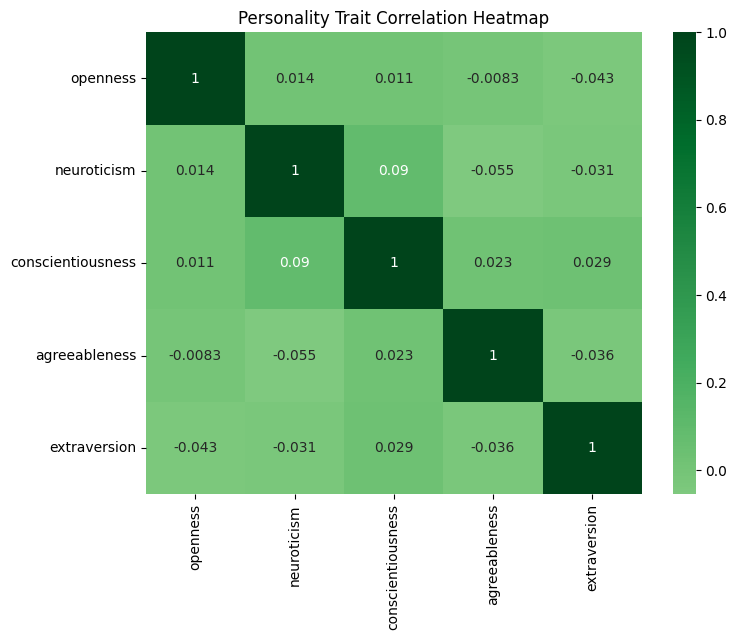

In [ ]:
# Correlation matrix
correlation_matrix = train_data[personality_traits].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', center=0)
plt.title('Personality Trait Correlation Heatmap')
plt.show()

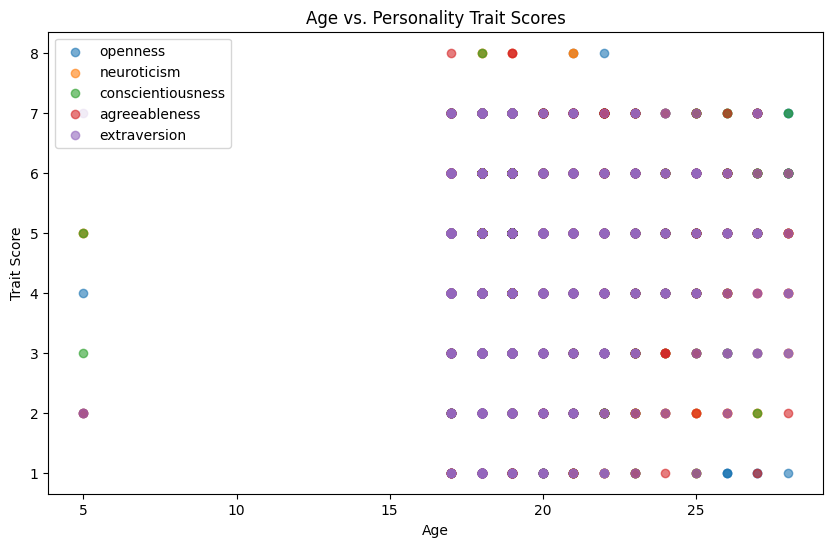

In [ ]:
# Scatter plot: Age vs. Personality Trait
plt.figure(figsize=(10, 6))
for trait in personality_traits:
    plt.scatter(train_data['Age'], train_data[trait], alpha=0.6, label=trait)
plt.xlabel('Age')
plt.ylabel('Trait Score')
plt.title('Age vs. Personality Trait Scores')
plt.legend()
plt.show()

##Data Preprocessing

In [ ]:
# Convert 'Gender' to numerical using LabelEncoder
label_encoder = LabelEncoder()
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'])
test_data['Gender'] = label_encoder.transform(test_data['Gender'])

In [ ]:
# Separate features and target variable for training data
X_train = train_data.drop(columns=['Personality (Class label)'])
y_train = train_data['Personality (Class label)']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['Personality (class label)'])
y_test = test_data['Personality (class label)']

##Model Training & Evaluation

Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.30793650793650795
Classification Report:
              precision    recall  f1-score   support

  dependable       0.14      0.38      0.21        21
 extraverted       0.38      0.38      0.38        77
      lively       0.08      0.17      0.11        24
 responsible       0.27      0.30      0.29        40
     serious       0.49      0.29      0.36       153

    accuracy                           0.31       315
   macro avg       0.27      0.30      0.27       315
weighted avg       0.38      0.31      0.33       315



Balanced Random Forest:


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.28888888888888886
Classification Report:
              precision    recall  f1-score   support

  dependable       0.11      0.29      0.16        21
 extraverted       0.42      0.39      0.40        77
      lively       0.08      0.17      0.11        24
 responsible       0.15      0.17      0.16        40
     serious       0.48      0.29      0.36       153

    accuracy                           0.29       315
   macro avg       0.25      0.26      0.24       315
weighted avg       0.37      0.29      0.31       315



Support Vector Classifier SVC

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6888888888888889
Classification Report:
              precision    recall  f1-score   support

  dependable       0.22      0.10      0.13        21
 extraverted       0.72      0.65      0.68        77
      lively       0.83      0.21      0.33        24
 responsible       1.00      0.30      0.46        40
     serious       0.68      0.97      0.80       153

    accuracy                           0.69       315
   macro avg       0.69      0.44      0.48       315
weighted avg       0.71      0.69      0.65       315



Applying Hypermeter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC(random_state=42)

# Define the hyperparameters to search through
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel types to try
}

# Step 4: Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_

# Step 6: Train the model with the best hyperparameters
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'kernel': 'rbf'}
Accuracy: 0.42857142857142855
Classification Report:
              precision    recall  f1-score   support

  dependable       0.07      0.10      0.08        21
 extraverted       0.45      0.32      0.38        77
      lively       0.16      0.21      0.18        24
 responsible       0.44      0.17      0.25        40
     serious       0.52      0.63      0.57       153

    accuracy                           0.43       315
   macro avg       0.33      0.29      0.29       315
weighted avg       0.44      0.43      0.42       315



Gradient Boosting Classifier:


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
model_gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gbc.fit(X_train, y_train)

# Predictions
y_pred_gbc = model_gbc.predict(X_test)

# Evaluation
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))


Accuracy (Gradient Boosting): 0.29523809523809524
Classification Report:
              precision    recall  f1-score   support

  dependable       0.07      0.19      0.11        21
 extraverted       0.40      0.32      0.36        77
      lively       0.09      0.25      0.13        24
 responsible       0.29      0.25      0.27        40
     serious       0.51      0.31      0.39       153

    accuracy                           0.30       315
   macro avg       0.27      0.27      0.25       315
weighted avg       0.39      0.30      0.33       315



K-Nearest Neighbors (KNN):

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
model_gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gbc.fit(X_train, y_train)

# Predictions
y_pred_gbc = model_gbc.predict(X_test)

# Evaluation
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))


Accuracy (Gradient Boosting): 0.29523809523809524
Classification Report:
              precision    recall  f1-score   support

  dependable       0.07      0.19      0.11        21
 extraverted       0.40      0.32      0.36        77
      lively       0.09      0.25      0.13        24
 responsible       0.29      0.25      0.27        40
     serious       0.51      0.31      0.39       153

    accuracy                           0.30       315
   macro avg       0.27      0.27      0.25       315
weighted avg       0.39      0.30      0.33       315



Logistic Regression:


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000, random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Accuracy (Logistic Regression): 0.834920634920635
Classification Report:
              precision    recall  f1-score   support

  dependable       0.75      0.29      0.41        21
 extraverted       0.80      0.91      0.85        77
      lively       0.82      0.75      0.78        24
 responsible       0.93      0.62      0.75        40
     serious       0.85      0.94      0.89       153

    accuracy                           0.83       315
   macro avg       0.83      0.70      0.74       315
weighted avg       0.84      0.83      0.82       315



Decision Tree Classifier:


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy (Decision Tree): 0.2984126984126984
Classification Report:
              precision    recall  f1-score   support

  dependable       0.10      0.24      0.14        21
 extraverted       0.32      0.26      0.29        77
      lively       0.14      0.29      0.19        24
 responsible       0.24      0.38      0.29        40
     serious       0.53      0.31      0.39       153

    accuracy                           0.30       315
   macro avg       0.26      0.29      0.26       315
weighted avg       0.38      0.30      0.32       315



AdaBoost Classifier:


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

print("Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_ada))
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))


Accuracy (AdaBoost): 0.3396825396825397
Classification Report:
              precision    recall  f1-score   support

  dependable       0.08      0.19      0.12        21
 extraverted       0.40      0.40      0.40        77
      lively       0.07      0.17      0.10        24
 responsible       0.38      0.20      0.26        40
     serious       0.55      0.39      0.46       153

    accuracy                           0.34       315
   macro avg       0.30      0.27      0.27       315
weighted avg       0.42      0.34      0.37       315



In [ ]:
!pip install tensorflow


Preprocessing for CNN:


In [ ]:
# Reshape the data to fit into CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

from sklearn.preprocessing import OneHotEncoder
# One-hot encoding for the labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Creating the CNN model:


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Number of neurons equals the number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Early stopping:


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Training the model:


In [ ]:
history = model.fit(
    X_train_reshaped, y_train_encoded,
    epochs=7,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test_encoded),
    callbacks=[early_stopping]
)


Epoch 1/7
23/23 [==============================] - 1s 30ms/step - loss: 1.6280 - accuracy: 0.2158 - val_loss: 1.8059 - val_accuracy: 0.2222
Epoch 2/7
23/23 [==============================] - 0s 14ms/step - loss: 1.6273 - accuracy: 0.2370 - val_loss: 1.6302 - val_accuracy: 0.2476
Epoch 3/7
23/23 [==============================] - 0s 13ms/step - loss: 1.6256 - accuracy: 0.2228 - val_loss: 1.4770 - val_accuracy: 0.4730
Epoch 4/7
23/23 [==============================] - 0s 18ms/step - loss: 1.6332 - accuracy: 0.1932 - val_loss: 1.5217 - val_accuracy: 0.4762
Epoch 5/7
23/23 [==============================] - 0s 16ms/step - loss: 1.6223 - accuracy: 0.2285 - val_loss: 1.4911 - val_accuracy: 0.4952
Epoch 6/7
23/23 [==============================] - 0s 18ms/step - loss: 1.6143 - accuracy: 0.2116 - val_loss: 1.4280 - val_accuracy: 0.5016
Epoch 7/7
23/23 [==============================] - 0s 14ms/step - loss: 1.6205 - accuracy: 0.2243 - val_loss: 1.4631 - val_accuracy: 0.5143


Visualizing the results:


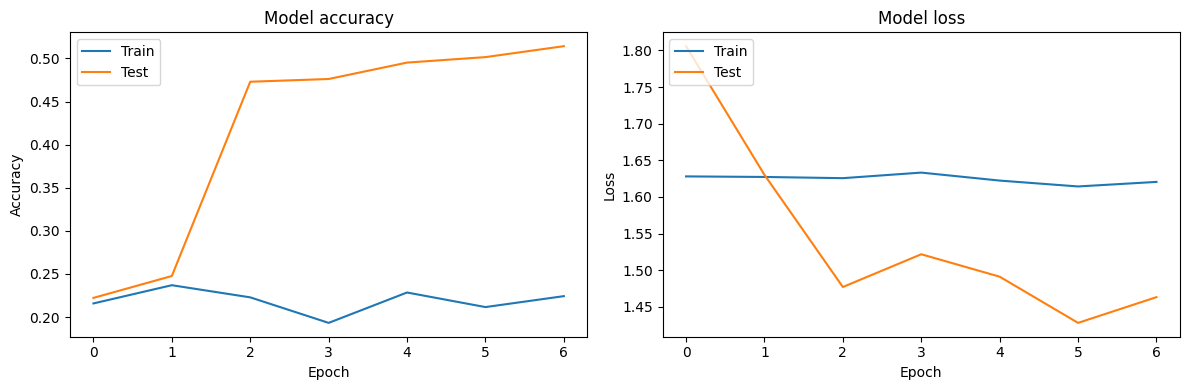

In [ ]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
